## How to use this notebook
Any Jupyter Notebook (JN) is made of "text" (Markdown) and "code" cells. Code cells must be executed to see the result of the program. To run a cell, select it and press Shift + Enter. Using Shift + Enter multiple times will execute consecutive blocks of code one after another, while skipping text cells (executing them does nothing). It is important to run the code cells in the order they appear in the notebook.

A complete version of this JN is available by request to instructors using the book "Exploring mathematics with CAS assistance" for teaching. This version has blank or partially blank code lines that are supposed to be completed by the user before running the code.

Code cells contain (nonexecutable) comments preceded by the pound sign. The comments are of two types:
- a short comment placed on a code line typically states what the result of implementation of the encoded operation is
- a comment placed on a separate line either names the result of the following block of code lines or provides some details only for the next line where a more involved operation is encoded

This JN was written by Lydia Novozhilova.




# Lab 11: Kepler's equation and Kepler's Second Law
### Kepler's Second Law:
**A line joining a planet and the Sun sweeps out equal areas durung equal intervals of time**.

### Kepler's equation:
$$ m(t)+e\cdot \sin\big(E(t)\big)-E(t) = 0.\qquad (*)$$
Here
- $e$: eccentricity of the elliptic orbit of planet
- $m(t) = 2\pi t/T$: mean anomaly
- $T$: orbital period
- $E(t)$: eccentric anomaly (see the explanation of the term on p 138)

## Problem formulation
Consider a planet orbiting around the Sun with period $T$ along the ellipse defined by parameters $a,\,e.$ Do the following.
- Make a function that shows that at $n$ equal time intervals of duration $T/n$ the planet sweeps out *approximately* (due to rounding) equal areas. Hint: Use parametric equation of the elliptic orbit in the form $x=a\cos\big(E(t)\big),\,y=b\sin\big(E(t)\big).$
- Make a function that takes parameters $a,\,e,\,T,\,n$ and plots a figure similar to Fig. 9.9 in the book.

For more details see Section 9.3.

## Brief description of this JN contents

### Help functions:

- **my_newton** implements a version of Newton-Raphson method to find approximation of solution to equation $f(x)=0.$ As a stopping criterion, the code uses condition $|f(x)|<\epsilon$ for a small parameter $\epsilon.$
- **solve_kepler** calls **my_newton** function to solve Kepler's equation. Values $m(t_k)$ of the mean anomaly are used as initial values for the function **my_newton**. (Here $t_k$ are end points of equal time intervals.)
- **find_angles** finds polar angles of planet positions at times $t_k.$
- **find_area** calculates area of a subregion of ellipse enclosed between polar radii of two points on the ellipse.

The function **main** returns list of areas of subregions swept out by the planet during $n$ equal-time intervals. The function **plot_figure** plots the figure required by the problem formulation.
### Special features
- Function **lambdify.** The primary purpose of this Sympy function is to provide a bridge from Sympy expressions to numerical libraries, such as NumPy, SciPy, etc. The **lambdify** function accelerates the code implementation. In the Sympy implementation of help function **my_newton** the inputs *f* and *fprime* must be functions, not expressions. Therefore, before calling this help function, the function **lambdify** is applied to the expression in the left-hand side of Kepler's equation and to the derivative of this expression with respect to the variable $E$ converting the two expressions into functions.

Useful ink: https://docs.sympy.org/latest/modules/utilities/lambdify.html.

- **Global variables.**
To make a variable created in some function available outside this function, one can use the keyword **global**. The **global** method is applied to three variables in the function **main** which are used then in the function **plot_figure**.





In [ ]:
# Loading libraries
from sympy import *
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Help function: Newton's method for solving equation f(x)=0.
# It is important that f and fprime are functions, not expressions

def my_newton(xini,eps, f,fprime):
  """
  Args:
    f,fprime: function and its derivative function
    xini: initial approximation of function f zero
    eps: parameter used in stopping condition
  Output:
    Approximation of solution to equation f(x)=0
  """
  var('x')
  x=xini
  res=np.abs(f(x))
  while res>eps:
    x=x-f(x)/? # complete encoding of formula for Newton's method
    res=np.abs(f(x))
  return x


In [ ]:
# Help function: Solving Kepler's equation.

def solve_kepler(n,k,e,eps):
  """
  Args:
    n: number of subdivisions of ellipse
    k: index of kth time value t_k
    eps: parameter used in stopping condition
  Output:
    Eval: approximation of parameter E for kth position of the planet
  """
  var('E')
  # Since t_k=k*T/n, m(t_k)=2pi*t_k/T=2pi*k/n
  # encode mean anomaly value at t=t_k
  mval = ?
  iniE = mval # initial guess for Newton's method
  expr1 = ? # encode lhs of (*) for t=t_k
  f_fcn = lambdify(E, expr1, 'numpy')
  expr2 = ? # encode the derivative d(expr1)/dE
  f_der = lambdify(E, expr2, 'numpy')
  Eval = my_newton(iniE,eps, f_fcn,f_der)
  return Eval


In [ ]:
#Examples
eval=solve_kepler(10.,10,0.7,0.001)
print(eval)

6.283185307179586


In [ ]:
# Help function: Polar angles of positions (formula (9.5), p 139.)

def find_angles(c,pos):
  """
  Args:
    c: x-coordinate of the right focus of the orbit
    pos: list of rectangular coordinates of planet positions
  Output:
    list of polar angles of planet positions
  """
  L =[np.pi-atan(p[1]/(c-p[0])) for p in pos]
  L[0] = 0 # correction of the angle at position [0,a].
  L.append(?) # append upper limit of integral for the last subarea
  return L


In [ ]:
# Help function: Finding subarea of ellipse

def find_area(theta1,theta2,a,e,r):
  """
  Args:
    theta1, theta2: polar angles (limits of integration)
    a: semi-major axis of elliptic orbit
    e: eccentricity of elliptic orbit
    r: number of digits in float approximation of area
  Output:
    subarea of ellipse enclosed between two polar radii
  """
  var('theta')
  # encode rhs of polar equation of ellipse
  expr = ?
  result = integrate(expr**2,(theta,theta1,theta2))
  area = (0.5*result).evalf(r)
  return area

In [ ]:
#Example
find_area(0,0.75,2.,0.7,4)

0.1463

In [ ]:
# Main function: Finding areas swept during equal time intervals

def main(a,e,T,n,eps,r):
  """
  Args:
    a: half-length of the major axis of ellipse
    e: eccentricity
    T: orbital period
    n: number of equal time periods
    eps: parameter for stopping criteria of Newton's method
    r: parameter for rounding results of calculations
  Output:
    list of areas swept by planet during n equal time intervals
  """
  # Find positions
  global pos,b,c # making these quantities available outside this function
  b = a*(1-e**2)**0.5
  c = (a**2-b**2)**0.5 # x-coordinate of the right focus
  # fill in the blank
  Evals = [solve_kepler(n,k,e,eps) for k in range(?)] # E-values for t_k
  # encode y-coordinates for positions
  pos = [[a*cos(E),?] for E in Evals]

  # Find areas
  angles = find_angles(c,pos)
  print('angles:',angles)
  areas = [find_area(angles[k],angles[k+1],a,e,r) for k in range(n)]
  print('areas:',areas)

  #Check
  s_approx = sum(areas)
  # encode expression for area of ellipse
  s = (?.evalf(r) # area of ellipse (approximated)
  print('sum of subareas:',s_approx,';', 'ellipse area:',s)


In [ ]:
# Example: Finding areas
main(2.,0.7,5.,6,0.01,5)

angles: [0, 2.45884995128535, 2.86818745473684, 3.14159265358979, 3.41499785244274, 3.82433535589423, 6.283185307179586]
areas: [1.4958, 1.4959, 1.4954, 1.4954, 1.4959, 1.4958]
sum of subareas: 8.9742 ; ellipse area: 8.9742


In [ ]:
# Making a required figure

def plot_figure(a,e,n):
  """
  Args:
    a: major semi-axis of orbit
    e: eccentricity
    n: number of equal time periods
  Output: required figure
  """
  # Set up figure parameters
  ax = plt.figure()
  plt.rcParams['figure.figsize'] = [3,2]
  ttl=input("Please enter title of the figure: ")
  plt.title(ttl)

  # Plot the orbit
  theta = np.linspace(0, 2 * np.pi, 60)
  x = ? # encode x-coordinate of orbit
  y = b * np.sin(theta)
  plt.plot(x, y)

  # Plot positions
  x,y =[[p[0] for p in pos],[p[1] for p in pos]]
  plt.scatter(x, y,color ='blue',s = 20) # positions plot
  # encode x- and y-coordinate of the Sun position (each is a list with one element)
  plt.scatter([?],[?],color='orange',s = 100) # the Sun plot

  # Plot lines from the Sun to positions
  for k in range(n):
    # encode y-coordinates for focus and kth position
    plt.plot([c,pos[k][0]],[?,pos[k][?]],color='blue',linestyle='--')
  plt.show()

Please enter title of the figure: T=5, n=6


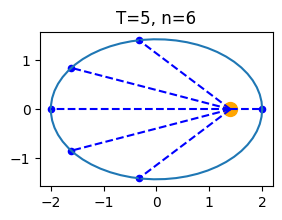

In [ ]:
plot_figure(2,0.7,6)

